In [1]:
# !pip install dataframe-image

In [2]:
# !pip install tabulate

Carrega os catalogos do gammapy

Verifica a existencia da fonte em cada um dos catalgos

Guarda a tabela dos pontos de fluxos

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# from astropy import units as u
# from gammapy.modeling.models import (
#     PowerLawSpectralModel,
#     ExpCutoffPowerLawSpectralModel,
#     LogParabolaSpectralModel,
#     SkyModel,
# )
# from gammapy.estimators import FluxPoints
from gammapy.datasets import FluxPointsDataset
# from gammapy.datasets import FluxPointsDataset, Datasets

# from gammapy.catalog import CATALOG_REGISTRY
# from gammapy.modeling import Fit

In [5]:
from gammapy.catalog import CATALOG_REGISTRY

In [6]:
import os
import sys
import importlib

module_path = os.path.abspath('modules/spectral_models')
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)
import spectral_models
importlib.reload(spectral_models)
from spectral_models import pwl_model

/home/gamma/Documents/GitHub/gammapy/gammapy-notebooks/0.20.1/simulations/LHAASO/modules/spectral_models


In [7]:
catalog_gammacat = CATALOG_REGISTRY.get_cls("gamma-cat")()
catalog_hgps = CATALOG_REGISTRY.get_cls("hgps")()
catalog_2hwc = CATALOG_REGISTRY.get_cls("2hwc")()
catalog_3fgl = CATALOG_REGISTRY.get_cls("3fgl")()
catalog_4fgl = CATALOG_REGISTRY.get_cls("4fgl")()
catalog_2fhl = CATALOG_REGISTRY.get_cls("2fhl")()
catalog_3fhl = CATALOG_REGISTRY.get_cls("3fhl")()
catalog_3hwc = CATALOG_REGISTRY.get_cls("3hwc")()

In [8]:
TeVCount_dict = {
    "LHAASO J1825-1326": ["HESS J1825-137", "HESS J1826-130", "2HWC J1825-134"], 
    "LHAASO J1908+0621": ["MGRO J1908+06" , "HESS J1908+063", "ARGO J1907+0627", "VER J1907+062", "2HWC J1908+063"], 
    "LHAASO J2226+6057": ["VER J2227+608"  , "Boomerang"]
}

In [9]:
catalog_tag = ["gamma-cat", "hgps", "2hwc", "3fgl", "4fgl", "2fhl", "3fhl", "3hwc"] 

In [10]:
lst=[]
for i in range(len(TeVCount_dict.keys())):
    LHAASO = list(TeVCount_dict.keys())[i]

    for j in range(len(TeVCount_dict[LHAASO])):
        cat_off = []
        cat_on = []
        
        TeVCount=TeVCount_dict[LHAASO][j]

        for k in range(len(catalog_tag)): 
            try:
                cat_name = catalog_tag[k]
                cat=CATALOG_REGISTRY.get_cls(cat_name)()
                src=cat[TeVCount]
                cat_on.append(catalog_tag[k])
            except:
                cat_off.append(catalog_tag[k])

            lst_k=[LHAASO, TeVCount, cat_on]
        
        lst.append(lst_k)
    
import pandas as pd 
# List1 
# lst = [['apple', 'red', 11], ['grape', 'green', 22], ['orange', 'orange', 33], ['mango', 'yellow', 44]] 
df = pd.DataFrame(lst, columns =['LHAASO', 'Conterpart', 'Catalog']) 
display(df) 

,LHAASO,Conterpart,Catalog
0,LHAASO J1825-1326,HESS J1825-137,"[gamma-cat, hgps, 3fgl, 4fgl, 2fhl, 3fhl]"
1,LHAASO J1825-1326,HESS J1826-130,"[gamma-cat, hgps, 4fgl, 3fhl]"
2,LHAASO J1825-1326,2HWC J1825-134,[2hwc]
3,LHAASO J1908+0621,MGRO J1908+06,"[gamma-cat, 3fgl, 4fgl]"
4,LHAASO J1908+0621,HESS J1908+063,"[gamma-cat, hgps]"
5,LHAASO J1908+0621,ARGO J1907+0627,[gamma-cat]
6,LHAASO J1908+0621,VER J1907+062,[gamma-cat]
7,LHAASO J1908+0621,2HWC J1908+063,[2hwc]
8,LHAASO J2226+6057,VER J2227+608,[]
9,LHAASO J2226+6057,Boomerang,"[3fgl, 4fgl]"


In [11]:
import pandas as pd
import dataframe_image as dfi

In [12]:
dfi.export(df, 'TeVCounterpart/flux_points/flux_points.png')

[0201/141948.984914:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0

[0201/141949.028464:WARNING:sandbox_linux.cc(385)] InitializeSandbox() called with multiple threads in process gpu-process.
[0201/141949.185901:INFO:headless_shell.cc(223)] 77424 bytes written to file /tmp/tmpr1jlz1zo/temp.png


In [13]:
catalog_tag = ["gamma-cat", "hgps", "2hwc", "3fgl", "4fgl", "2fhl", "3fhl", "3hwc"] 
lst=[]
for i in range(len(TeVCount_dict.keys())):
    LHAASO = list(TeVCount_dict.keys())[i]

    for j in range(len(TeVCount_dict[LHAASO])):
        cat_off = []
        cat_on = []
        
        pf_off = []
        pf_on = []
        
        TeVCount=TeVCount_dict[LHAASO][j]

        for k in range(len(catalog_tag)): 
            cat_name = catalog_tag[k]
            
            try:
                cat=CATALOG_REGISTRY.get_cls(cat_name)()
                src=cat[TeVCount]
                cat_on.append(catalog_tag[k])
                
                ds = FluxPointsDataset(
                    data=src.flux_points, 
                    name=cat_name
                )
                table = ds.data.to_table(sed_type="dnde", formatted=True)
                pf_on.append(catalog_tag[k])
            except:
                cat_off.append(catalog_tag[k])

            lst_k=[LHAASO, TeVCount, cat_on, pf_on]
        lst.append(lst_k)
    
import pandas as pd 

df = pd.DataFrame(lst, columns =['LHAASO', 'Conterpart', 'Catalog', 'Flux Points']) 
display(df) 

,LHAASO,Conterpart,Catalog,Flux Points
0,LHAASO J1825-1326,HESS J1825-137,"[gamma-cat, hgps, 3fgl, 4fgl, 2fhl, 3fhl]","[gamma-cat, hgps, 3fgl, 4fgl, 2fhl, 3fhl]"
1,LHAASO J1825-1326,HESS J1826-130,"[gamma-cat, hgps, 4fgl, 3fhl]","[gamma-cat, hgps, 4fgl, 3fhl]"
2,LHAASO J1825-1326,2HWC J1825-134,[2hwc],[]
3,LHAASO J1908+0621,MGRO J1908+06,"[gamma-cat, 3fgl, 4fgl]","[gamma-cat, 3fgl, 4fgl]"
4,LHAASO J1908+0621,HESS J1908+063,"[gamma-cat, hgps]","[gamma-cat, hgps]"
5,LHAASO J1908+0621,ARGO J1907+0627,[gamma-cat],[gamma-cat]
6,LHAASO J1908+0621,VER J1907+062,[gamma-cat],[gamma-cat]
7,LHAASO J1908+0621,2HWC J1908+063,[2hwc],[]
8,LHAASO J2226+6057,VER J2227+608,[],[]
9,LHAASO J2226+6057,Boomerang,"[3fgl, 4fgl]","[3fgl, 4fgl]"


In [14]:
list(TeVCount_dict.keys())[i]

'LHAASO J2226+6057'

In [15]:
display(CATALOG_REGISTRY.get_cls("2hwc")()["2HWC J1825-134"].info())

'\n*** Basic info ***\n\nCatalog row index (zero-based) : 13\nSource name : 2HWC J1825-134\n\n*** Position info ***\n\nRA: 276.460 deg\nDEC: -13.401 deg\nGLON: 18.115 deg\nGLAT: -0.526 deg\nPosition error: 0.086 deg\n\n*** Spectral info ***\n\nSpectrum 0:\nFlux at 7 TeV: 1.38e-13 +- 8.1e-15 cm-2 s-1 TeV-1\nSpectral index: -2.580 +- 0.040\nTest Radius: 0.0 deg\n\nSpectrum 1:\nFlux at 7 TeV: 2.49e-13 +- 1.14e-14 cm-2 s-1 TeV-1\nSpectral index: -2.560 +- 0.030\nTest Radius: 0.9 deg\n\n'

In [16]:
base_dir  = "TeVCounterpart"
child_dir = "flux_points"
format_file = ".dat"

In [17]:
from pathlib import Path

In [18]:
def mkdir_base_child(base_dir, child_dir):
    '''Creates a directory: base_dir/child_dir and returs the path 
    mkdir_base_child(base_dir, child_dir)
    >>> path_child
    '''
    path_base = Path(f"{base_dir}")
    path_base.mkdir(exist_ok=True)

    path_child = Path(f"{path_base}/{child_dir}")
    path_child.mkdir(exist_ok=True)
    
    return path_child

In [19]:
path=mkdir_base_child("catalogs_data", "flux_points")

In [20]:
catalog_tag = ["gamma-cat", "hgps", "2hwc", "3fgl", "4fgl", "2fhl", "3fhl", "3hwc"] 
sed_type="dnde"
lst=[]


for i in range(len(TeVCount_dict.keys())):
    LHAASO_src = list(TeVCount_dict.keys())[i]
    LHAASO_id = LHAASO_src.replace(" ", "")
    
    for j in range(len(TeVCount_dict[LHAASO_src])):
        cat_off = []
        cat_on = []
        
        pf_off = []
        pf_on = []
        
        TeVCount=TeVCount_dict[LHAASO_src][j]
        TeVCount_id = TeVCount.replace(" ", "")
        for k in range(len(catalog_tag)): 
            cat_name = catalog_tag[k]
            
            try:
                cat=CATALOG_REGISTRY.get_cls(cat_name)()
                src=cat[TeVCount]
                cat_on.append(catalog_tag[k])
                
                ds = FluxPointsDataset(
                    data=src.flux_points, 
                    name=cat_name
                )
                pf_on.append(catalog_tag[k])
                table = ds.data.to_table(sed_type=sed_type, formatted=True)
                file_name = f'{LHAASO_id}_{TeVCount_id}_{cat_name}{format_file}'
                path=mkdir_base_child("catalogs_data", "flux_points")
                path_name = os.path.abspath(
                    os.path.join(
                        f"{path}/{file_name}"
                                )
                )
                
                # print(path_name)
                if path_name not in sys.path:
                    sys.path.append(path_name)

                table.write(f"{path_name}",format='ascii.ecsv', overwrite=True)

                
            except:
                cat_off.append(catalog_tag[k])

            lst_k=[LHAASO_src, TeVCount, cat_on, pf_on]
        lst.append(lst_k)
    
import pandas as pd 

df = pd.DataFrame(lst, columns =['LHAASO', 'TeV Conterpart', 'Catalog', 'Flux Points']) 
display(df) 

,LHAASO,TeV Conterpart,Catalog,Flux Points
0,LHAASO J1825-1326,HESS J1825-137,"[gamma-cat, hgps, 3fgl, 4fgl, 2fhl, 3fhl]","[gamma-cat, hgps, 3fgl, 4fgl, 2fhl, 3fhl]"
1,LHAASO J1825-1326,HESS J1826-130,"[gamma-cat, hgps, 4fgl, 3fhl]","[gamma-cat, hgps, 4fgl, 3fhl]"
2,LHAASO J1825-1326,2HWC J1825-134,[2hwc],[]
3,LHAASO J1908+0621,MGRO J1908+06,"[gamma-cat, 3fgl, 4fgl]","[gamma-cat, 3fgl, 4fgl]"
4,LHAASO J1908+0621,HESS J1908+063,"[gamma-cat, hgps]","[gamma-cat, hgps]"
5,LHAASO J1908+0621,ARGO J1907+0627,[gamma-cat],[gamma-cat]
6,LHAASO J1908+0621,VER J1907+062,[gamma-cat],[gamma-cat]
7,LHAASO J1908+0621,2HWC J1908+063,[2hwc],[]
8,LHAASO J2226+6057,VER J2227+608,[],[]
9,LHAASO J2226+6057,Boomerang,"[3fgl, 4fgl]","[3fgl, 4fgl]"


In [21]:
len(df["Flux Points"].sum())

19

In [22]:
TeVCount_dict[LHAASO_src]

['VER J2227+608', 'Boomerang']

In [23]:
base_dir  = "TeVCounterpart"
child_dir = "flux_points"
format_file = ".dat"

LHAASO_name = list(TeVCount_dict.keys())[0]
src_name =  list(TeVCount_dict.values())[0][2]



for i in range(len(TeVCount_dict.keys())):
    LHAASO_name = list(TeVCount_dict.keys())[i]
    print(f"{LHAASO_name}")

    for j in range(len(TeVCount_dict[LHAASO_name])):
        src_name=TeVCount_dict[LHAASO_name][j]
        
        LHAASO_id = LHAASO_name.replace(" ", "")
        src_id = src_name.replace(" ", "")

        print(f"{src_name}")
        for k in range(len(catalog_tag)): 
            
            try:
                cat_name = catalog_tag[k]
                cat=CATALOG_REGISTRY.get_cls(cat_name)()
                src=cat[src_name]
  
                ds = FluxPointsDataset(
            #             spectral_model=src.spectral_model,
                    data=src.flux_points, 
                    name=cat_name
                )
                table = ds.data.to_table(sed_type="dnde", formatted=True)



#                 file_name = f'{src_id}_{base_dir}_{cat_name}{format_file}'
#                 mkdir_base_child(base_dir, child_dir)

                path_name = os.path.abspath(os.path.join(f"{base_dir}/{child_dir}/{file_name}"))
                # print(path_name)
                if path_name not in sys.path:
                    sys.path.append(path_name)

                table.write(f"{path_name}",format='ascii.ecsv', overwrite=True)

        
                print(f"{catalog_tag[k]}")

            except:
                 print(f"{catalog_tag[k]} (an exception occurred)")
    print(" ")
    print("***")


LHAASO J1825-1326
HESS J1825-137
gamma-cat
hgps
2hwc (an exception occurred)
3fgl
4fgl
2fhl
3fhl
3hwc (an exception occurred)
HESS J1826-130
gamma-cat
hgps
2hwc (an exception occurred)
3fgl (an exception occurred)
4fgl
2fhl (an exception occurred)
3fhl
3hwc (an exception occurred)
2HWC J1825-134
gamma-cat (an exception occurred)
hgps (an exception occurred)
2hwc (an exception occurred)
3fgl (an exception occurred)
4fgl (an exception occurred)
2fhl (an exception occurred)
3fhl (an exception occurred)
3hwc (an exception occurred)
 
***
LHAASO J1908+0621
MGRO J1908+06
gamma-cat
hgps (an exception occurred)
2hwc (an exception occurred)
3fgl
4fgl
2fhl (an exception occurred)
3fhl (an exception occurred)
3hwc (an exception occurred)
HESS J1908+063
gamma-cat
hgps
2hwc (an exception occurred)
3fgl (an exception occurred)
4fgl (an exception occurred)
2fhl (an exception occurred)
3fhl (an exception occurred)
3hwc (an exception occurred)
ARGO J1907+0627
gamma-cat
hgps (an exception occurred)
2hwc

In [24]:
    for i  in range(len(catalog_tag)): 
        try:
            cat_name = catalog_tag[i]
            cat=CATALOG_REGISTRY.get_cls(cat_name)()
            src=cat[src_name]

        except:
            print(f"********An exception occurred: {catalog_tag[i]}********")

# for key, value in TeVCount_dict.items():
#     LHAASO.append(key)
#     TeVCount.append(value)
# print(LHAASO, TeVCount)

# cat=CATALOG_REGISTRY.get_cls(cat_name)()
#         src=cat[src_name]
    

********An exception occurred: gamma-cat********
********An exception occurred: hgps********
********An exception occurred: 2hwc********
********An exception occurred: 2fhl********
********An exception occurred: 3fhl********
********An exception occurred: 3hwc********


In [25]:
LHAASO = []
TeVCount = []

for key, value in TeVCount_dict.items():
    LHAASO.append(key)
    TeVCount.append(value)

    print(LHAASO, TeVCount)

['LHAASO J1825-1326'] [['HESS J1825-137', 'HESS J1826-130', '2HWC J1825-134']]
['LHAASO J1825-1326', 'LHAASO J1908+0621'] [['HESS J1825-137', 'HESS J1826-130', '2HWC J1825-134'], ['MGRO J1908+06', 'HESS J1908+063', 'ARGO J1907+0627', 'VER J1907+062', '2HWC J1908+063']]
['LHAASO J1825-1326', 'LHAASO J1908+0621', 'LHAASO J2226+6057'] [['HESS J1825-137', 'HESS J1826-130', '2HWC J1825-134'], ['MGRO J1908+06', 'HESS J1908+063', 'ARGO J1907+0627', 'VER J1907+062', '2HWC J1908+063'], ['VER J2227+608', 'Boomerang']]


In [26]:
LHAASO_name = list(TeVCount_dict.keys())[0]
src_name =  list(TeVCount_dict.values())[0][1]

LHAASO_id = LHAASO_name.replace(" ", "")
src_id = src_name.replace(" ", "")

In [27]:
LHAASO_name, LHAASO_id

('LHAASO J1825-1326', 'LHAASOJ1825-1326')

In [28]:
src_name, src_id

('HESS J1826-130', 'HESSJ1826-130')

In [29]:
# CATALOG_REGISTRY.get_cls("2hwc")()["HESS J1908+063"]

In [30]:
catalog_tag = ["gamma-cat", "hgps", "2hwc", "3fgl", "4fgl", "2fhl", "3fhl", "3hwc"] 

catalog = []
catalog_name = []
source = []
spatial_model = []
spectral_model = []
sky_model = []
dataset = []
for i  in range(len(catalog_tag)): 
    try:
        cat_name = catalog_tag[i]
        cat=CATALOG_REGISTRY.get_cls(cat_name)()
        src=cat[src_name]

        ds = FluxPointsDataset(
#             spectral_model=src.spectral_model,
            data=src.flux_points, 
            name=cat_name
        )
        table = ds.data.to_table(sed_type="dnde", formatted=True)
        (table)
        
        base_dir  = "flux_points"
        child_dir = "catalog"
        format_file = ".dat"


#         file_name = f'{src_id}_{base_dir}_{cat_name}{format_file}'
#         mkdir_base_child(base_dir, child_dir)

        path_name = os.path.abspath(os.path.join(f"{base_dir}/{child_dir}/{file_name}"))
        # print(path_name)
        if path_name not in sys.path:
            sys.path.append(path_name)

        table.write(f"{path_name}",format='ascii.ecsv', overwrite=True)

        
        
        catalog.append(cat)
        source.append(src)
        spectral_model.append(src.spectral_model)
        spatial_model.append(src.spatial_model)
        sky_model.append(src.sky_model)
        catalog_name.append(cat_name)
        dataset.append(ds)

        
    except:
        print(f"********An exception occurred: {catalog_tag[i]}********")

********An exception occurred: gamma-cat********
********An exception occurred: hgps********
********An exception occurred: 2hwc********
********An exception occurred: 3fgl********
********An exception occurred: 4fgl********
********An exception occurred: 2fhl********
********An exception occurred: 3fhl********
********An exception occurred: 3hwc********


In [31]:
spectral_model

[]

In [32]:
dataset = Datasets(dataset)

NameError: name 'Datasets' is not defined

In [ ]:
print_flux()

In [ ]:
# ax = plt.subplot()
# ax.yaxis.set_units(u.Unit("TeV cm-2 s-1"))

# kwargs = {"ax": ax, "sed_type": "e2dnde"}

# for d in dataset:
#     d.data.plot(label=d.name, **kwargs)
# energy_bounds = [1e-5, 1e3] * u.TeV
# title = f"{LHAASO_name}:  {src_name}"
# ax.set_title(title)
# ax.legend(loc="best")
# ax.set_ylim(1e-13, 1e-9)
# ax.set_xlim(energy_bounds)
# ax.legend()

# file_name = LHAASO_id+"_"+src_id
# plt.savefig(file_name, bbox_inches='tight')
# # path_flux = mkdir_base_child("analysis", "flux_points")

# # plt_savefig(path_flux, "flux_points")

In [33]:
from astropy import units as u

# %matplotlib inline
import matplotlib.pyplot as plt
from gammapy.catalog import CATALOG_REGISTRY
from gammapy.datasets import Datasets, FluxPointsDataset
from gammapy.modeling import Fit
from gammapy.modeling.models import (
    Models,
    ExpCutoffPowerLawSpectralModel,
    LogParabolaSpectralModel,
    PowerLawSpectralModel,
    SkyModel,
)

In [34]:
catalog_gammacat = CATALOG_REGISTRY.get_cls("gamma-cat")()
catalog_hgps = CATALOG_REGISTRY.get_cls("hgps")()
catalog_2hwc = CATALOG_REGISTRY.get_cls("2hwc")()
catalog_3fgl = CATALOG_REGISTRY.get_cls("3fgl")()
catalog_4fgl = CATALOG_REGISTRY.get_cls("4fgl")()
catalog_2fhl = CATALOG_REGISTRY.get_cls("2fhl")()
catalog_3fhl = CATALOG_REGISTRY.get_cls("3fhl")()
catalog_3hwc = CATALOG_REGISTRY.get_cls("3hwc")()

In [35]:
source_gammacat = catalog_gammacat["HESS J1825-137"]
source_hgps = catalog_hgps["HESS J1825-137"]
source_fermi_3fgl = catalog_3fgl["HESS J1825-137"]
source_fermi_4fgl = catalog_4fgl["HESS J1825-137"]
source_fermi_2fhl = catalog_2fhl["HESS J1825-137"]
source_fermi_3fhl = catalog_3fhl["HESS J1825-137"]

In [36]:
dataset_gammacat = FluxPointsDataset(data=source_gammacat.flux_points, name="gammacat")
dataset_gammacat.data.to_table(sed_type="dnde", formatted=True)

e_ref,dnde,dnde_errp,dnde_errn,is_ul
TeV,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),
float64,float64,float64,float64,bool
0.278,3.436e-10,2.252e-11,2.252e-11,False
0.430,1.297e-10,5.368e-12,5.365e-12,False
0.692,4.966e-11,1.685e-12,1.683e-12,False
1.114,1.608e-11,6.032e-13,6.023e-13,False
1.793,5.038e-12,2.370e-13,2.366e-13,False
2.888,1.827e-12,9.853e-14,9.828e-14,False
4.653,5.035e-13,4.203e-14,4.191e-14,False
7.502,1.468e-13,1.762e-14,1.755e-14,False


In [37]:
dataset_hgps = FluxPointsDataset(data=source_hgps.flux_points, name="hgps")
dataset_hgps.data.to_table(sed_type="dnde", formatted=True)

e_ref,e_min,e_max,dnde,dnde_errp,dnde_errn,dnde_ul,is_ul
TeV,TeV,TeV,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),
float64,float64,float64,float64,float64,float64,float64,bool
0.365,0.237,0.562,2.382e-10,1.654e-11,1.642e-11,2.715e-10,False
0.866,0.562,1.334,3.503e-11,1.954e-12,1.959e-12,3.880e-11,False
2.054,1.334,3.162,5.060e-12,3.169e-13,3.173e-13,5.707e-12,False
5.109,3.162,8.254,5.446e-13,5.658e-14,5.534e-14,6.582e-13,False
12.711,8.254,19.573,4.615e-14,9.701e-15,9.341e-15,6.613e-14,False
30.142,19.573,46.416,2.724e-15,1.646e-15,1.420e-15,6.221e-15,False


In [38]:
dataset_3fgl = FluxPointsDataset(data=source_fermi_3fgl.flux_points, name="3fgl")
dataset_3fgl.data.to_table(sed_type="dnde", formatted=True)

e_ref,e_min,e_max,dnde,dnde_errp,dnde_errn,dnde_ul,sqrt_ts,is_ul
MeV,MeV,MeV,1 / (cm2 MeV s),1 / (cm2 MeV s),1 / (cm2 MeV s),1 / (cm2 MeV s),,
float64,float64,float64,float64,float64,float64,float64,float32,bool
173.205,100.000,300.000,1.332e-12,1.132e-10,nan,2.276e-10,0.000,True
547.723,300.000,1000.000,1.754e-13,5.458e-12,nan,1.109e-11,0.000,True
1732.051,1000.000,3000.000,5.674e-13,6.492e-13,nan,1.866e-12,0.791,True
5477.226,3000.000,10000.000,5.019e-13,7.766e-14,7.544e-14,nan,7.021,False
31622.777,10000.000,100000.000,3.246e-14,3.337e-15,3.301e-15,nan,11.703,False


In [39]:
dataset_4fgl = FluxPointsDataset(data=source_fermi_4fgl.flux_points, name="4fgl")
dataset_4fgl.data.to_table(sed_type="dnde", formatted=True)

e_ref,e_min,e_max,dnde,dnde_errp,dnde_errn,dnde_ul,sqrt_ts,is_ul
MeV,MeV,MeV,1 / (cm2 MeV s),1 / (cm2 MeV s),1 / (cm2 MeV s),1 / (cm2 MeV s),,
float64,float64,float64,float64,float64,float64,float64,float32,bool
70.711,50.000,100.000,6.564e-12,7.901e-09,nan,1.581e-08,0.000,True
173.205,100.000,300.000,6.940e-12,5.115e-10,nan,1.030e-09,0.000,True
547.723,300.000,1000.000,1.442e-11,1.172e-11,1.191e-11,nan,1.215,False
1732.051,1000.000,3000.000,2.664e-12,5.204e-13,5.148e-13,nan,5.218,False
5477.226,3000.000,10000.000,5.134e-13,4.646e-14,4.646e-14,nan,11.553,False
17320.508,10000.000,30000.000,7.079e-14,6.341e-15,6.341e-15,nan,12.197,False
54772.256,30000.000,100000.000,9.974e-15,9.260e-16,9.260e-16,nan,12.737,False
316227.766,100000.000,1000000.000,3.647e-16,4.031e-17,3.856e-17,nan,12.315,False


In [40]:
dataset_2fhl = FluxPointsDataset(data=source_fermi_2fhl.flux_points, name="2fhl")
dataset_2fhl.data.to_table(sed_type="dnde", formatted=True)

e_ref,e_min,e_max,dnde,dnde_errp,dnde_errn,dnde_ul,is_ul
GeV,GeV,GeV,1 / (cm2 GeV s),1 / (cm2 GeV s),1 / (cm2 GeV s),1 / (cm2 GeV s),
float64,float64,float64,float64,float64,float64,float64,bool
92.466,50.000,171.000,4.244e-12,4.789e-13,4.589e-13,nan,False
316.283,171.000,585.000,4.154e-13,7.339e-14,6.709e-14,nan,False
1081.665,585.000,2000.000,3.700e-14,1.355e-14,1.151e-14,nan,False


In [41]:
dataset_3fhl = FluxPointsDataset(data=source_fermi_3fhl.flux_points, name="3fhl")
dataset_3fhl.data.to_table(sed_type="dnde", formatted=True)

e_ref,e_min,e_max,dnde,dnde_errp,dnde_errn,dnde_ul,sqrt_ts,is_ul
GeV,GeV,GeV,1 / (cm2 GeV s),1 / (cm2 GeV s),1 / (cm2 GeV s),1 / (cm2 GeV s),,
float64,float64,float64,float64,float64,float64,float64,float32,bool
14.142,10.000,20.000,8.280e-11,1.246e-11,1.203e-11,nan,7.407,False
31.623,20.000,50.000,2.345e-11,2.931e-12,2.892e-12,nan,9.344,False
86.603,50.000,150.000,3.823e-12,5.535e-13,5.277e-13,nan,8.718,False
273.861,150.000,500.000,4.934e-13,8.687e-14,8.072e-14,nan,8.078,False
1000.000,500.000,2000.000,2.936e-14,1.121e-14,1.048e-14,nan,3.514,False


In [42]:
pwl = PowerLawSpectralModel(
    index=2, amplitude="1e-12 cm-2 s-1 TeV-1", reference="1 TeV"
)
model = SkyModel(spectral_model=pwl, name="j1507-pl")

In [43]:
datasets = Datasets([dataset_gammacat, dataset_hgps, dataset_3fgl,dataset_4fgl,dataset_2fhl, dataset_3fhl])
datasets.models = model
print(datasets)

fitter = Fit()
result_pwl = fitter.run(datasets=datasets)

Datasets
--------

Dataset 0: 

  Type       : FluxPointsDataset
  Name       : gammacat
  Instrument : 
  Models     : ['j1507-pl']

Dataset 1: 

  Type       : FluxPointsDataset
  Name       : hgps
  Instrument : 
  Models     : ['j1507-pl']

Dataset 2: 

  Type       : FluxPointsDataset
  Name       : 3fgl
  Instrument : 
  Models     : ['j1507-pl']

Dataset 3: 

  Type       : FluxPointsDataset
  Name       : 4fgl
  Instrument : 
  Models     : ['j1507-pl']

Dataset 4: 

  Type       : FluxPointsDataset
  Name       : 2fhl
  Instrument : 
  Models     : ['j1507-pl']

Dataset 5: 

  Type       : FluxPointsDataset
  Name       : 3fhl
  Instrument : 
  Models     : ['j1507-pl']




In [44]:
print(result_pwl)

print(model)

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 91
	total stat : 895.83

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

SkyModel

  Name                      : j1507-pl
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      2.064   +/-    0.00             
    amplitude                     :   1.59e-11   +/- 2.4e-13 1 / (cm2 s TeV)
    reference             (frozen):      1.000       TeV         




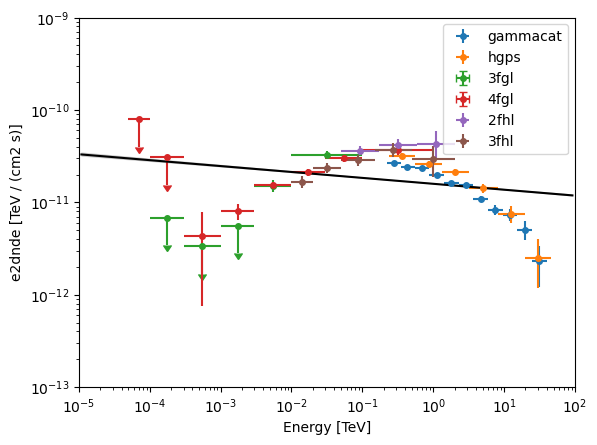

In [45]:
ax = plt.subplot()
ax.yaxis.set_units(u.Unit("TeV cm-2 s-1"))

kwargs = {"ax": ax, "sed_type": "e2dnde"}

for d in datasets:
    d.data.plot(label=d.name, **kwargs)

energy_bounds = [1e-5, 1e2] * u.TeV
pwl.plot(energy_bounds=energy_bounds, color="k", **kwargs)
pwl.plot_error(energy_bounds=energy_bounds, **kwargs)
ax.set_ylim(1e-13, 1e-9)
ax.set_xlim(energy_bounds)
ax.legend()
plt.show()

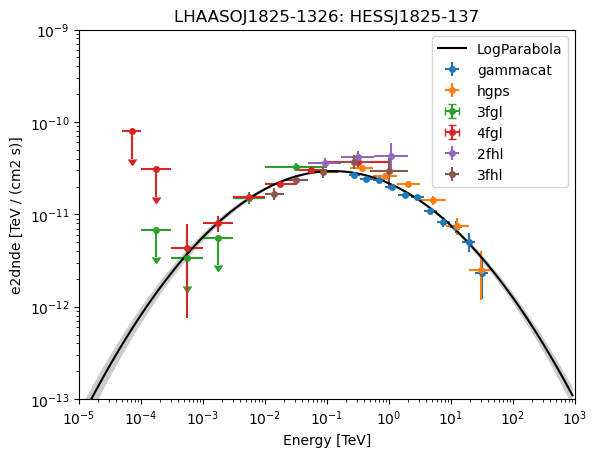

In [46]:
log_parabola = LogParabolaSpectralModel(
    alpha=2, amplitude="1e-12 cm-2 s-1 TeV-1", reference="1 TeV", beta=0.1
)
model = SkyModel(spectral_model=log_parabola, name="j1507-lp")

datasets.models = model
result_log_parabola = fitter.run(datasets=datasets)
# print(model)
# print(result_log_parabola)
ax = plt.subplot()

kwargs = {"ax": ax, "sed_type": "e2dnde"}

ax.yaxis.set_units(u.Unit("TeV cm-2 s-1"))

for d in datasets:
    d.data.plot(label=d.name, **kwargs)
energy_bounds = [1e-5, 1e3] * u.TeV

log_parabola.plot(energy_bounds=energy_bounds, color="k", **kwargs, label="LogParabola")
log_parabola.plot_error(energy_bounds=energy_bounds, **kwargs)
ax.set_ylim(1e-13, 1e-9)
ax.set_xlim(energy_bounds)
ax.legend(loc=1)
plt.title("LHAASOJ1825-1326: HESSJ1825-137")

plt.savefig("LHAASOJ1825-1326_HESSJ1825-137_fit", bbox_inches='tight')
plt.show()


In [47]:
(result_log_parabola.parameters.to_table)

<bound method Parameters.to_table of <gammapy.modeling.parameter.Parameters object at 0x7f6ebc0344f0>>

In [48]:
models = Models([model])

type(models.to_yaml())

str

In [49]:
print(models.to_parameters_table())

 model     type      name     value    ... max frozen is_norm link
-------- -------- --------- ---------- ... --- ------ ------- ----
j1507-lp spectral amplitude 2.1633e-11 ... nan  False    True     
j1507-lp spectral reference 1.0000e+00 ... nan   True   False     
j1507-lp spectral     alpha 2.2939e+00 ... nan  False   False     
j1507-lp spectral      beta 7.0589e-02 ... nan  False   False     


In [50]:
Texttable = models.to_parameters_table()["name","value", "error", "unit"]

In [ ]:
headers=Texttable.colnames

In [ ]:
print(tabulate(Texttable,headers=headers,tablefmt="latex", floatfmt=".3e"))

In [ ]:
help(tabulate)

In [ ]:
table=Texttable
df = pd.DataFrame(table.to_pandas)
print(df)

In [ ]:
print(df.to_latex(index=False))

In [ ]:
from tabulate import tabulate
print('Tabulate Table:')
print(tabulate(Texttable, headers='firstrow'))
table = Texttable()
table.set_cols_align(["c"] * 4)
table.set_deco(Texttable.HEADER | Texttable.VLINES)
print('\nTexttable Table:')
print(table.draw())

In [ ]:
models.write("models.yaml", overwrite=True)

In [ ]:
models_read = Models.read("models.yaml")

In [ ]:
type(models_read)

In [ ]:
models.write("models.yaml", overwrite=True)

models_read = Models.read("models.yaml")

In [ ]:
print(models_read)

In [ ]:
import yaml
from pprint import pprint
# convert yaml document to dict
data = yaml.load(models.to_yaml(), Loader=yaml.Loader)
print(data)


In [ ]:
df = pd.DataFrame(data) 
display(df) 

In [ ]:
# dfi.export(ff, 'TeVCounterpart/flux_points/flux_pointss.png')

In [ ]:
help(FluxPointsDataset)

In [ ]:
catalog_tag = ["gamma-cat", "hgps", "2hwc", "3fgl", "4fgl", "2fhl", "3fhl", "3hwc"] 
lst=[]
ds_lst = []
for i in range(len(TeVCount_dict.keys())):
    LHAASO = list(TeVCount_dict.keys())[i]

    for j in range(len(TeVCount_dict[LHAASO])):
        cat_off = []
        cat_on = []
        
        pf_off = []
        pf_on = []
        ds_j=[]
        TeVCount=TeVCount_dict[LHAASO][j]

        for k in range(len(catalog_tag)): 
            cat_name = catalog_tag[k]
            
            try:
                cat=CATALOG_REGISTRY.get_cls(cat_name)()
                src=cat[TeVCount]
                cat_on.append(catalog_tag[k])
                
                ds = FluxPointsDataset(
                    data=src.flux_points, 
                    name=cat_name
                )
                ds_j.append(ds)
                pf_on.append(catalog_tag[k])
            except:
                cat_off.append(catalog_tag[k])

            lst_k=[LHAASO, TeVCount, cat_on, pf_on]
        lst.append(lst_k)
        ds_lst.append(ds_j)
import pandas as pd 
# List1 
# lst = [['apple', 'red', 11], ['grape', 'green', 22], ['orange', 'orange', 33], ['mango', 'yellow', 44]] 
df = pd.DataFrame(lst, columns =['LHAASO', 'Conterpart', 'Catalog', 'Flux Points']) 
display(df) 

In [ ]:
type(src.flux_points)

In [ ]:
(ds_lst)

In [ ]:
print(ds_lst[1][0].data.iter_by_axis)

In [ ]:
ds_lst[0][0].data.sqrt_ts_threshold_ul

In [ ]:
print(ds_lst[1][0].data.energy_max)

In [ ]:
datasets = Datasets(ds_lst[1])
datasets.models = model
print(datasets)

fitter = Fit()
result_pwl = fitter.run(datasets=datasets)

In [ ]:
ecpl = ExpCutoffPowerLawSpectralModel(
    index=1.8,
    amplitude="2e-12 cm-2 s-1 TeV-1",
    reference="1 TeV",
    lambda_="0.1 TeV-1",
)
model = SkyModel(spectral_model=ecpl, name="j1507-ecpl")

datasets.models = model
result_log_parabola = fitter.run(datasets=datasets)
# print(model)
# print(result_log_parabola)
ax = plt.subplot()

kwargs = {"ax": ax, "sed_type": "e2dnde"}

ax.yaxis.set_units(u.Unit("TeV cm-2 s-1"))

for d in datasets:
    d.data.plot(label=d.name, **kwargs)
energy_bounds = [1e-5, 1e3] * u.TeV

ecpl.plot(energy_bounds=energy_bounds, color="k", **kwargs, label="LogParabola")
ecpl.plot_error(energy_bounds=energy_bounds, **kwargs)
ax.set_ylim(1e-13, 1e-9)
ax.set_xlim(energy_bounds)
ax.legend(loc=1)
plt.title("LHAASOJ1825-1326: HESSJ1825-137")

plt.savefig("LHAASOJ1825-1326_HESSJ1825-137_fit", bbox_inches='tight')
plt.show()


In [ ]:
datasets.slice_by_energy(1e3* u.TeV,  1e-2* u.TeV )

In [ ]:
src.data['ASSOC_GAM2']

In [ ]:
import numpy as np
from astropy import units as u
from astropy.table import Table
from gammapy.estimators import FluxPoints
from gammapy.modeling.models import PowerLawSpectralModel
table = Table()
pwl = PowerLawSpectralModel()
e_ref = np.geomspace(1, 100, 7) * u.TeV
table["e_ref"] = e_ref
table["dnde"] = pwl(e_ref)
table["dnde_err"] = pwl.evaluate_error(e_ref)[0]
table.meta["SED_TYPE"] = "dnde"
flux_points = FluxPoints.from_table(table)
flux_points.plot(sed_type="flux") 